<a href="https://colab.research.google.com/github/Tanisha2910/Data-Science-Python/blob/master/TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import io
import csv
from textblob import TextBlob
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import nltk
import nltk.stem as stemmer
from nltk.corpus import stopwords
import textmining

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
 pip install textmining

     |████████████████████████████████| 1.9MB 4.5MB/s 
  Created wheel for textmining: filename=textmining-1.0-cp27-none-any.whl size=1855282 sha256=dbac9895d404ddc2bee0cd87f98935c36c98a603a7b73ce9b68cd07529c70a87
  Stored in directory: /root/.cache/pip/wheels/7a/1f/78/0a67c3d717378ec9d9a840a8d7d2b959796cbf505f388d35ea
Successfully built textmining


In [3]:
 pip install vaderSentiment

     |████████████████████████████████| 133kB 4.6MB/s 


In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# pip install -U textblob

In [0]:
post = pd.read_csv("https://raw.githubusercontent.com/Tanisha2910/Data-Science-Python/master/Post.csv")

In [8]:
post.head(20)

,Id,Post
0,1,cumin seed) and Hepatitis
1,2,iron overload chelation diabetes and hepatitis
2,3,please help me.
3,4,two different test results!
4,5,miscarriage and devastation..!!
5,6,Heart Dysfunction Tied in Thalassemia. Take V...
6,7,arthritis and fibromyalgia
7,8,Exjade)
8,9,please help!
9,10,Good News? Yeah I guess so :)


In [9]:
# Select files for few text
# here we will extract only 1000 obs from whole dataset
post = post.iloc[:1000,]
post.shape

(1000, 2)

In [0]:
# Now before applying preprocessing techniques we need to convert the whole dataframe into a corpus 
# corpus is nothing but the combination of multiple text document

In [0]:
# Extract stop words
# here we are loading all the predefined stopwords that are present in the library so that we can analyse and remove the 
# stopwords present in our data
stop = set(stopwords.words('english'))

#extract punctuation marks
exclude = set(string.punctuation)


In [0]:
stop

{u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'ain',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'aren',
 u"aren't",
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'couldn',
 u"couldn't",
 u'd',
 u'did',
 u'didn',
 u"didn't",
 u'do',
 u'does',
 u'doesn',
 u"doesn't",
 u'doing',
 u'don',
 u"don't",
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'hadn',
 u"hadn't",
 u'has',
 u'hasn',
 u"hasn't",
 u'have',
 u'haven',
 u"haven't",
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'isn',
 u"isn't",
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'just',
 u'll',
 u'm',
 u'ma',
 u'me',
 u'mightn',
 u"mightn't",
 u'more',
 u'most',
 u'mustn',
 u"mustn't",
 u'my',
 u'myself',
 u'needn',
 u"needn't",
 u'no',
 u'nor',
 u'not',
 u'now',
 u'o',
 u'of',
 u'off',
 

In [0]:
exclude

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [0]:
# Test pre processing
# here we will do the preprocessing of the data
# in 1st loop - doc is just a simple text , here we are converting in lower case. and after that i am splitting each words seperately and then passing into the if i where i is nothing but each word not in stop
# join is used to add all the words and " " is initializing a space
# num_free is where i have stores all the text free from stopwords, punctuation and all lower case
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    num_free = ''.join(i for i in punc_free if not i.isdigit())
    return num_free
  
post_corpus = [clean(post.iloc[i,1]) for i in range(0, post.shape[0])]
# in above is shown the anthor way of initializing the loop
# post .shape will give the no of obsevation present in the document. iloc[i,1] means for(i=1)


In [12]:
type(post_corpus)

list

In [0]:
post_corpus[3]

'two different test results'

In [0]:
post.head(5)

,Id,Post
0,1,cumin seed) and Hepatitis
1,2,iron overload chelation diabetes and hepatitis
2,3,please help me.
3,4,two different test results!
4,5,miscarriage and devastation..!!


In [13]:
# create document term matrix
# here we will convert this text to data frame format

tdm = textmining.TermDocumentMatrix()

for  i in post_corpus:
     print(i)
     tdm.add_doc(i)
  # here it will convertthe text in document matrix

cumin seed hepatitis
iron overload chelation diabetes hepatitis
please help me
two different test results
miscarriage devastation
heart dysfunction tied thalassemia take vitamin please
arthritis fibromyalgia
exjade
please help
good news yeah guess 
liver 
im new forum
pushing kidney
problems growth problems
  
kelfer desferal
question
help me im suffering worse fatigue dizzy
anyone tried heard
guidance please
trait carrier
need advise
need help
common this
blank
minors also affected
antacids drug interactions
blood test iron cbc liver adding up
hb levels closer intermedia
cirhosis liver tumor
recommended 
hon mr ted chudleigh
today hb 
bone marrow transplantation centre
supplements health
take iron not
fatigue iron levels
 kg
iron dropping  help
treat 
eugenio lamesa
pregnant hypothyroidismfeed back appreciated
kelfer treatment pkan successful oakland
heart failure
suggestions anything
ferritin around  safe
that
starchconjugating deferoxamine sdfo
desferal l combination
etc
jadenu appr

In [0]:
type(tdm)

textmining.TermDocumentMatrix

In [0]:
# Write tdm into dataframe
tdm.write_csv('TDM_DataFrame.csv', cutoff = 1)

In [15]:
# load the same data frame for analysis
df = pd.read_csv('TDM_DataFrame.csv')
df

,alltheodora,adviced,four,woods,pneumoniococcus,cyprus,looking,pardon,norovirus,uszaini,dela,hormone,classifications,werid,disturb,wooden,wednesday,advisethanks,specially,onethanks,tired,abdulwahab,supportplease,thalassemia,feasibility,second,sustaining,kodak,mls,cooking,trasfusion,fingers,optimen,designing,increasing,specialist,reporter,herb,here,dore,...,catching,infusions,umairs,infants,demonstrate,httpwwwcdcgovnorovirusaboutoverviewhtmlhttpwwwonlinebiologydegreecomnorovirusesantibiotics,stirring,multis,thurst,problemes,tonightthen,babyitoday,happen,mutual,avoided,improving,sharedcare,incredible,percent,other,sick,conclusion,junk,kinds,diagnosis,chelators,jung,risked,implanonfor,accomplish,pumps,kinda,gaggy,medicationu,intentionally,aabha,riboflavin,volumes,gynecologist,marroweven
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
post.head()
# compare with above doc

In [0]:
df.shape

(1000, 7393)

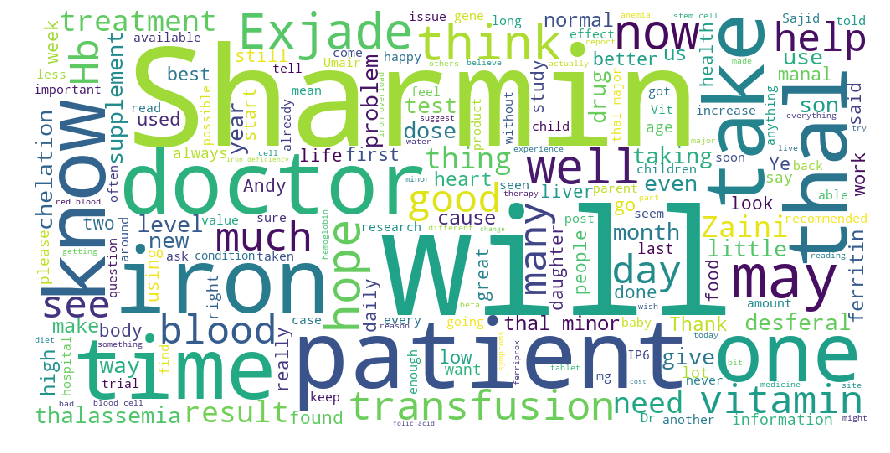

In [16]:
# Plot Wordcloud
# stopwords = STOPWORDS  means here we want to remove the stopwords if there are any in the data
# post is the name of the variable
# imshow will show the word cloud

wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(' '.join(post['Post']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

 **SENTIMENT ANALYSIS**

In [0]:
# Sentiment Analysis using text blob
# HERE WE WILL APPLY THE TEXT BLOB METHOD TO EXTRACT THE SENTIMENT FROM THE DATA
# create empty dataframe to store results
FinalResults = pd.DataFrame()

# Run Engine
# here loop will in each of iteration it will take each of the tect and then apply sentiment analysis on it.
# post.shape[0] will tell us the no of observation present in the data(corpus), and range is from 0 to no of observation present in the data
# textblob is a library which helps to extract the sentiment of data, post.iloc[i, 1] here i will start from 1 or 2nd columns
# now we will store the above data into a proper pandas dataframe to understand the data better, Comments= 1st variable in the new data frame, Polarity = here we will store polarity of te comment
# blob.sentiment.polarity}, index=[0]= it will tell u that it is +ve, -ve or neutral and index[0]= means we alwaz need to pass the index when we loof over the dataframe

for i in range(0, post.shape[0]):
    #print(i)
    blob = TextBlob(post.iloc[i, 1])
    
    temp = pd.DataFrame({'Comments': post.iloc[i,1], 'Polarity': blob.sentiment.polarity}, index=[0])
    
    FinalResults = FinalResults.append(temp)

In [18]:
FinalResults
# if polarity = 0 means neutral comments
# if polarity > 0 means +ve comment
# if polarity < 0 means -ve comment

,Comments,Polarity
0,cumin seed) and Hepatitis,0.000000
0,iron overload chelation diabetes and hepatitis,0.000000
0,please help me.,0.000000
0,two different test results!,0.000000
0,miscarriage and devastation..!!,0.000000
0,Heart Dysfunction Tied in Thalassemia. Take V...,0.000000
0,arthritis and fibromyalgia,0.000000
0,Exjade),0.000000
0,please help!,0.000000
0,Good News? Yeah I guess so :),0.600000


In [19]:
FinalResults['Polarity'].describe()

count    1000.000000
mean        0.154147
std         0.230974
min        -0.666667
25%         0.000000
50%         0.106548
75%         0.265559
max         1.000000
Name: Polarity, dtype: float64

In [25]:

# HERE WE WILL DO SENTIMENT ANALYSIS USING VADER
FinalResults_Vader = pd.DataFrame()

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run engine
for i in range(0, post.shape[0]):
    print(i)
    snt = analyzer.polarity_scores(post.iloc[i,1])
    temp = pd.DataFrame({'Comments': post.iloc[i,1], 'Polarity': snt.items()[3][1]}, index=[0])
    FinalResults_Vader = FinalResults_Vader.append(temp)

TypeError: ignored